In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import pylab as py
import math
import warnings
import os
from decimal import Decimal

from matplotlib.collections import LineCollection, PatchCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from os import listdir
from os.path import isfile, join

pd.set_option("precision", 6)

In [2]:
font = {'family' : 'Helvetica',
        'weight' : 'normal',
        'size'   : 10}

mpl.rc('font', **font)

In [3]:
def choose_subplot_dimensions(k):
    if k < 4:
        return k, 1
    elif k < 11:
        return math.ceil(k/2), 2
    else:
        # I've chosen to have a maximum of 3 columns
        return math.ceil(k/5), 5


def generate_subplots(k, row_wise=False):
    nrow, ncol = choose_subplot_dimensions(k)
    # Choose your share X and share Y parameters as you wish:
    figure, axes = plt.subplots(nrow, ncol,
                                sharex=False,
                                sharey=False, figsize = (sz))

    # Check if it's an array. If there's only one plot, it's just an Axes obj
    if not isinstance(axes, np.ndarray):
        return figure, [axes]
    else:
        # Choose the traversal you'd like: 'F' is col-wise, 'C' is row-wise
        axes = axes.flatten(order=('C' if row_wise else 'F'))

        # Delete any unused axes from the figure, so that they don't show
        # blank x- and y-axis lines
        for idx, ax in enumerate(axes[k:]):
            figure.delaxes(ax)

            # Turn ticks on for the last ax in each column, wherever it lands
            idx_to_turn_on_ticks = idx + k - ncol if row_wise else idx + k - 1
            for tk in axes[idx_to_turn_on_ticks].get_xticklabels():
                tk.set_visible(True)

        axes = axes[:k]
        return figure, axes

## Import all the datafiles 

In [5]:
idf = '0hfld'
nickname = 'agubh2-10km'
dataset = 'master'
#folder = f'mc-{idf}-{nickname}'
mypath = '/Volumes/SAF_MSCWORK/Python/Stratigraphy/Data/nparrays/master/'
savefilesto = '/Volumes/SAF_MSCWORK/Python/Stratigraphy/Plots/statstest/'

onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles = sorted(onlyfiles)
datalibrary = [s.replace('.npy', '') for s in onlyfiles]



Import histogram output arrays from the codes and concatenate them into a master array of histograms. Sturcture is as follows:
- Rows = Cross sections
- Columns = Bin edges and histogram counts
- Planes = Different variables. Stack order = topo, shear, depth, velocity

Use this master to compare across the datasets. Ensure outputs have all the same shape else it'll go bonkers

In [6]:
#import all the arrays into 2 master histogrm arrays
rows = 1
cols = 12
planes = 4
histogram_data = np.empty([rows, cols-1, planes]) # each row will be a different cross section, in downstream direction
bin_data = np.empty([rows, cols, planes])          #cols are the histogram bins, planes are the diff variables

mypath = '/Volumes/SAF_MSCWORK/Python/Stratigraphy/Data/nparrays/'
onlyhists = [f for f in listdir(mypath+'masterhist') if isfile(join(mypath+'masterhist', f))]
onlyhists = sorted(onlyhists)

onlybins = [f for f in listdir(mypath+'masterbins') if isfile(join(mypath+'masterbins', f))]
onlybins = sorted(onlybins)

for filename in os.listdir('/Volumes/SAF_MSCWORK/Python/Stratigraphy/Data/nparrays/masterhist/'):
    scratchh = np.load(f'{mypath}masterhist/{filename}')
    histogram_data = np.append(histogram_data, scratchh, axis=0)

for filename in os.listdir('/Volumes/SAF_MSCWORK/Python/Stratigraphy/Data/nparrays/masterbins/'):
    scratchb = np.load(f'{mypath}masterbins/{filename}')
    bin_data = np.append(bin_data, scratchb, axis=0)
histogram_data = np.delete(histogram_data, 0, axis=0)
bin_data = np.delete(bin_data, 0, axis=0)
print(histogram_data.shape, bin_data.shape)

(80, 11, 4) (80, 12, 4)


Text(0.5, 0.98, 'All Timesteps')

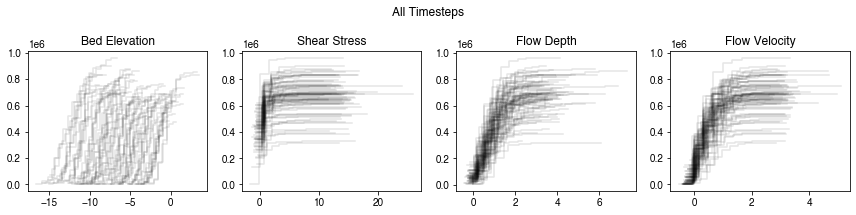

In [9]:
fig, ax = plt.subplots(1, 4, figsize = (12, 3), tight_layout = True)

ax = ax.ravel()
names = ['Bed Elevation', 'Shear Stress', 'Flow Depth', 'Flow Velocity']
planes = np.arange(0, histogram_data.shape[2])
rows = np.arange(0, histogram_data.shape[0])
for p in planes: #plot one variable at a time
    for r in rows:
        left, right = bin_data[r, :-1, p], bin_data[r, 1:, p] 
        X =  np.array([left, right]).T.flatten()
        Y = np.array([np.cumsum(histogram_data[r, :, p]), np.cumsum(histogram_data[r, :, p])]).T.flatten()
        ax[p].plot(X,Y, 'k', alpha=0.1)
    ax[p].set_title(names[p])
#ax[1].set_xlim(0, 6)
fig.suptitle('All Timesteps')

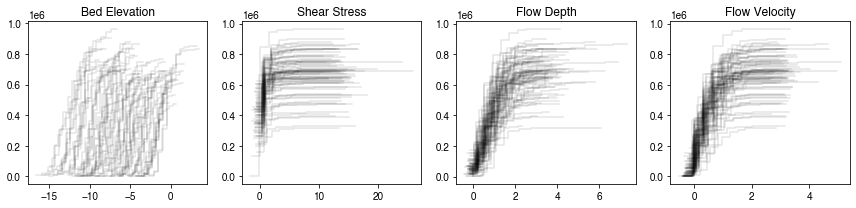

In [8]:
fig, ax = plt.subplots(1, 4, figsize = (12, 3), tight_layout = True)

ax = ax.ravel()
names = ['Bed Elevation', 'Shear Stress', 'Flow Depth', 'Flow Velocity']
planes = np.arange(0, histogram_data.shape[2])
rows = np.arange(0, histogram_data.shape[0])
for p in planes: #plot one variable at a time
    for r in rows:
        left, right = bin_data[r, :-1, p], bin_data[r, 1:, p] 
        X =  np.array([left, right]).T.flatten()
        Y = np.array([np.cumsum(histogram_data[r, :, p]), np.cumsum(histogram_data[r, :, p])]).T.flatten()
        ax[p].plot(X,Y, 'k', alpha=0.1)
    ax[p].set_title(names[p])
#ax[1].set_xlim(0, 6)

In [13]:
head = ['ages', 'centx', 'centy', 'area', 'minx', 'miny', 'maxx', 'maxy', 'width', 'height', 'icd', 'reltime', 'delx', 'dely']  
for idx, i in enumerate(onlyfiles):
    idat = np.load('/Volumes/SAF_MSCWORK/Python/Stratigraphy/Data/nparrays/centroids_mainsurfs/'+folder+'/'+i, allow_pickle = True)
    datalibrary[idx] = pd.DataFrame(idat, columns=head) 

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/SAF_MSCWORK/Python/Stratigraphy/Data/nparrays/centroids_mainsurfs/mc-0hfld-agubh2-10km/agubh2-10km_0hfld_430_master.npy'

head = ['ages', 'centx', 'centy', 'area', 'minx', 'miny', 'maxx', 'maxy', 'width', 'height', 'icd', 'reltime', 'delx', 'dely']  
for idx, i in enumerate(onlyfiles):
    idat = np.load('/Volumes/SAF_MSCWORK/Python/Stratigraphy/Data/nparrays/centroids_mainsurfs/'+folder+'/'+i, allow_pickle = True)
    datalibrary[idx] = pd.DataFrame(idat, columns=head) 

Calculate angle and whr data

In [7]:
for dat in datalibrary:
    whr = dat['delx']/dat['dely']
    dat['whr'] = whr
    y1=np.array(dat['centy'][:10])
    y0=np.array(dat['centy'][-10:])
    x1=dat['centx'][5:]
    x0=dat['centx'][:-10]
    #print(y1, y0)
    #print(x1-x0)
    angle = np.degrees(np.arctan(abs(np.array(dat['centy'][1:])-np.array(dat['centy'][:-1]))/
                                 abs(np.array(dat['centx'][1:])-np.array(dat['centx'][:-1]))))
    angle = np.concatenate(([np.nan], angle))
    dat['angle']=angle


So, now the centroids data for each section is stored as a singular dataframe in the data library. The library is full of books, and each book is a numpy array for each section.  

## Distribution tests

In [18]:
labels = ['area', 'width', 'height', 'delx', 'dely', 'angle']

Some histograms

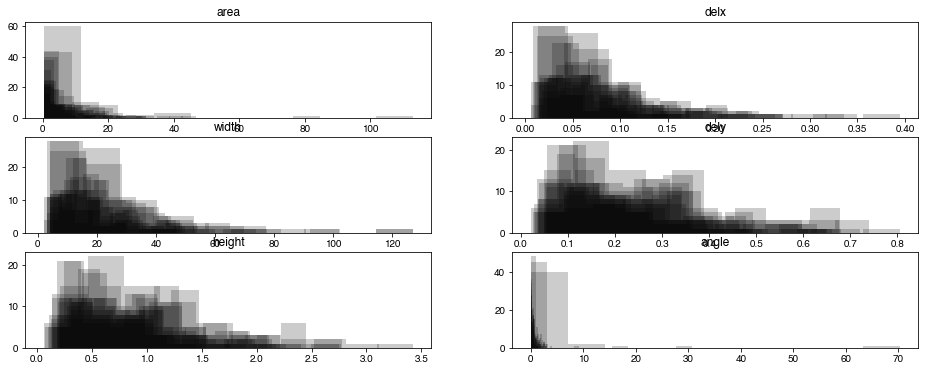

In [9]:
fig, ax = generate_subplots(len(labels))
ax = ax.ravel()


for dat in range(len(onlyfiles)):
    ax[0].hist(datalibrary[dat][labels[0]], bins = 10, fc= 'k', alpha = 0.2)
    ax[1].hist(datalibrary[dat][labels[1]], bins = 10, fc = 'k', alpha = 0.2)
    ax[2].hist(datalibrary[dat][labels[2]], bins = 10, fc = 'k', alpha = 0.2)
    ax[3].hist(datalibrary[dat][labels[3]], bins = 10, fc = 'k', alpha = 0.2)
    ax[4].hist(datalibrary[dat][labels[4]], bins = 10, fc = 'k', alpha = 0.2)
    ax[5].hist(datalibrary[dat][labels[5]], bins = 10, fc = 'k', alpha = 0.2)
for a in range(len(ax)):
    ax[a].set_title(f'{labels[a]}')
    

I got this script from this medium article: https://medium.com/@amirarsalan.rajabi/distribution-fitting-with-python-scipy-bb70a42c0aed <br>
It tests a dataset against all of scipy's distributions and returns the highest p vals

In [10]:
list_of_dists = ['alpha','anglit','arcsine','beta','betaprime','bradford','burr','burr12',
                 'cauchy','chi','chi2','cosine','dgamma','dweibull','erlang','expon','exponnorm',
                 'exponweib','exponpow','f','fatiguelife','fisk','foldcauchy','foldnorm','frechet_r',
                 'frechet_l','genlogistic','genpareto','gennorm','genexpon','genextreme','gausshyper',
                 'gamma','gengamma','genhalflogistic','gilbrat','gompertz','gumbel_r','gumbel_l','halfcauchy',
                 'halflogistic','halfnorm','halfgennorm','hypsecant','invgamma','invgauss','invweibull',
                 'johnsonsb','johnsonsu','kstwobign','laplace','levy','levy_l','logistic','loggamma',
                 'loglaplace','lognorm','lomax','maxwell','mielke','nakagami','ncx2','ncf','nct','norm',
                 'pareto','pearson3','powerlaw','powerlognorm','powernorm','rdist','reciprocal','rayleigh',
                 'rice','recipinvgauss','semicircular','t','triang','truncexpon','truncnorm','tukeylambda',
                 'uniform','vonmises','vonmises_line','wald','weibull_min','weibull_max']
#%%capture --no-stdout
measurement = 'area'
res = pd.DataFrame()

for dat in range(len(onlyfiles)):

    warnings.filterwarnings("ignore", category=RuntimeWarning) 

    results = []
    for i in list_of_dists:
        dist = getattr(stats, i)
        param = dist.fit(datalibrary[dat][measurement])
        a = stats.kstest(datalibrary[dat][measurement], i, args=param)
        results.append((i,a[0],a[1]))
    
    
    results.sort(key=lambda x:float(x[2]), reverse=True)
    for j in results[:10]:
        print(onlyfiles[dat])
        print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `frechet_r` is deprecated!
The distribution `frechet_r` is a synonym for `weibull_min`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_min`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `frechet_l` is deprecated!
The distribution `frechet_l` is a synonym for `weibull_max`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_max`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
/opt/anaconda3/lib/python3.7/site-pack

mc100.npy
ncf: statistic=0.06195805545765182, pvalue=0.9896127672643937
mc100.npy
erlang: statistic=0.06357997349831734, pvalue=0.9860965504129614
mc100.npy
nakagami: statistic=0.0752562403079132, pvalue=0.9348695732599192
mc100.npy
bradford: statistic=0.07851122930875765, pvalue=0.9116885589917958
mc100.npy
pearson3: statistic=0.0789180382237627, pvalue=0.9085258243138646
mc100.npy
gausshyper: statistic=0.08389528375652033, pvalue=0.8654298082318385
mc100.npy
johnsonsb: statistic=0.09097910339884341, pvalue=0.7924453659555522
mc100.npy
beta: statistic=0.09339210683441201, pvalue=0.7736574710586388
mc100.npy
chi: statistic=0.09361493633179219, pvalue=0.7702626545382503
mc100.npy
lomax: statistic=0.09390973940120075, pvalue=0.7657821626793163


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `frechet_r` is deprecated!
The distribution `frechet_r` is a synonym for `weibull_min`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_min`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `frechet_l` is deprecated!
The distribution `frechet_l` is a synonym for `weibull_max`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_max`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
/opt/anaconda3/lib/python3.7/site-pack

mc125.npy
ncf: statistic=0.053136690928331815, pvalue=0.9861139211885361
mc125.npy
invgamma: statistic=0.06291306823450894, pvalue=0.9347850502188947
mc125.npy
genextreme: statistic=0.06330163181015547, pvalue=0.9317082560510329
mc125.npy
invweibull: statistic=0.0633040766264612, pvalue=0.9316886442397526
mc125.npy
nct: statistic=0.06640916765262184, pvalue=0.904288612699923
mc125.npy
lomax: statistic=0.06715347768544627, pvalue=0.8970063271943296
mc125.npy
gilbrat: statistic=0.06725757613201361, pvalue=0.8959667781938736
mc125.npy
fisk: statistic=0.06750944621886545, pvalue=0.8934304895246153
mc125.npy
genpareto: statistic=0.06751365825331508, pvalue=0.8933878229623298
mc125.npy
pearson3: statistic=0.06898640360126274, pvalue=0.8779739461592317


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `frechet_r` is deprecated!
The distribution `frechet_r` is a synonym for `weibull_min`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_min`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `frechet_l` is deprecated!
The distribution `frechet_l` is a synonym for `weibull_max`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_max`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
/opt/anaconda3/lib/python3.7/site-pack

mc150.npy
ncf: statistic=0.0628194421151228, pvalue=0.9849634772219268
mc150.npy
ncx2: statistic=0.0671023972215744, pvalue=0.9708203098297403
mc150.npy
gausshyper: statistic=0.07401294468894981, pvalue=0.9335963459591247
mc150.npy
burr: statistic=0.07521091130234714, pvalue=0.9252623056772182
mc150.npy
nakagami: statistic=0.07999654130418365, pvalue=0.8867139157498957
mc150.npy
exponweib: statistic=0.08044103883817533, pvalue=0.8827318725749883
mc150.npy
f: statistic=0.08183697154289815, pvalue=0.8698179320039938
mc150.npy
frechet_r: statistic=0.08288244749067064, pvalue=0.8597579357727911
mc150.npy
weibull_min: statistic=0.08288244749067064, pvalue=0.8597579357727911
mc150.npy
halfgennorm: statistic=0.08696604183661127, pvalue=0.8176318707744915


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `frechet_r` is deprecated!
The distribution `frechet_r` is a synonym for `weibull_min`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_min`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `frechet_l` is deprecated!
The distribution `frechet_l` is a synonym for `weibull_max`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_max`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
/opt/anaconda3/lib/python3.7/site-pack

mc175.npy
ncf: statistic=0.05073189424914737, pvalue=0.9987344609693108
mc175.npy
chi: statistic=0.065029343625358, pvalue=0.9718555186121968
mc175.npy
frechet_r: statistic=0.06583701798463029, pvalue=0.9684351646423816
mc175.npy
weibull_min: statistic=0.06583701798463029, pvalue=0.9684351646423816
mc175.npy
pearson3: statistic=0.06738355796159468, pvalue=0.9611600359070722
mc175.npy
beta: statistic=0.06966986476363529, pvalue=0.9486172739569639
mc175.npy
mielke: statistic=0.07270905488196511, pvalue=0.9286138699108846
mc175.npy
johnsonsb: statistic=0.08078454150840719, pvalue=0.8582199297898585
mc175.npy
gausshyper: statistic=0.08328771114518918, pvalue=0.8320572746306129
mc175.npy
halfgennorm: statistic=0.0871966355127412, pvalue=0.7880998231461167


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `frechet_r` is deprecated!
The distribution `frechet_r` is a synonym for `weibull_min`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_min`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `frechet_l` is deprecated!
The distribution `frechet_l` is a synonym for `weibull_max`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_max`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
/opt/anaconda3/lib/python3.7/site-pack

mc200.npy
pearson3: statistic=0.05048571821850939, pvalue=0.9984516581671887
mc200.npy
genexpon: statistic=0.05374642543518526, pvalue=0.9961175002829111
mc200.npy
exponpow: statistic=0.05564326045775181, pvalue=0.9938572753822228
mc200.npy
gompertz: statistic=0.058548666942430994, pvalue=0.9886492461257184
mc200.npy
lomax: statistic=0.05899032247649971, pvalue=0.9876416104191887
mc200.npy
expon: statistic=0.060476826355824076, pvalue=0.9837800261078937
mc200.npy
exponnorm: statistic=0.0608808117544436, pvalue=0.982599271053886
mc200.npy
burr12: statistic=0.061573084003083034, pvalue=0.9804392770797838
mc200.npy
johnsonsb: statistic=0.06415924251925198, pvalue=0.9707592349673324
mc200.npy
mielke: statistic=0.0665425625217354, pvalue=0.9594469865902052


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `frechet_r` is deprecated!
The distribution `frechet_r` is a synonym for `weibull_min`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_min`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `frechet_l` is deprecated!
The distribution `frechet_l` is a synonym for `weibull_max`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_max`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
/opt/anaconda3/lib/python3.7/site-pack

mc225.npy
exponweib: statistic=0.05570192015777908, pvalue=0.9650765903139514
mc225.npy
mielke: statistic=0.056141358426562205, pvalue=0.9625576382547971
mc225.npy
f: statistic=0.05805906443613823, pvalue=0.950245796522206
mc225.npy
halfgennorm: statistic=0.058927241116100815, pvalue=0.943960155327227
mc225.npy
ncf: statistic=0.06485189944456488, pvalue=0.889541698504758
mc225.npy
nct: statistic=0.06546044151797756, pvalue=0.8828851633614705
mc225.npy
pearson3: statistic=0.06618236377746489, pvalue=0.8747550432156302
mc225.npy
genextreme: statistic=0.06658782523025217, pvalue=0.8700811845475369
mc225.npy
invweibull: statistic=0.06659031089637285, pvalue=0.8700522979386058
mc225.npy
invgauss: statistic=0.06675634532289815, pvalue=0.8681163908867776


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `frechet_r` is deprecated!
The distribution `frechet_r` is a synonym for `weibull_min`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_min`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `frechet_l` is deprecated!
The distribution `frechet_l` is a synonym for `weibull_max`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_max`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
/opt/anaconda3/lib/python3.7/site-pack

mc250.npy
recipinvgauss: statistic=0.06167657212228117, pvalue=0.9632613882069876
mc250.npy
johnsonsb: statistic=0.06322726271758994, pvalue=0.9545290383974688
mc250.npy
halfgennorm: statistic=0.06416288314210361, pvalue=0.9486966859665624
mc250.npy
fatiguelife: statistic=0.06493841527065813, pvalue=0.9435394330723693
mc250.npy
johnsonsu: statistic=0.06940323806215398, pvalue=0.9082542297121069
mc250.npy
lognorm: statistic=0.06948092699727926, pvalue=0.9075585029438514
mc250.npy
powerlognorm: statistic=0.06963271576786156, pvalue=0.9061914435638163
mc250.npy
ncx2: statistic=0.07489471386333324, pvalue=0.8529033923275975
mc250.npy
lomax: statistic=0.07494462546104147, pvalue=0.8523476428036257
mc250.npy
gamma: statistic=0.07594936427346233, pvalue=0.840982582508041


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `frechet_r` is deprecated!
The distribution `frechet_r` is a synonym for `weibull_min`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_min`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `frechet_l` is deprecated!
The distribution `frechet_l` is a synonym for `weibull_max`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_max`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
/opt/anaconda3/lib/python3.7/site-pack

mc275.npy
ncf: statistic=0.07832642987985328, pvalue=0.8885369076303526
mc275.npy
chi: statistic=0.0909501249691766, pvalue=0.759261907170054
mc275.npy
f: statistic=0.10068706955548817, pvalue=0.6143394236541057
mc275.npy
gausshyper: statistic=0.10163891988402513, pvalue=0.6010712709238643
mc275.npy
exponnorm: statistic=0.10388817383346272, pvalue=0.5703888135297609
mc275.npy
expon: statistic=0.10717561027024991, pvalue=0.5272706635296391
mc275.npy
halfcauchy: statistic=0.10777091627959706, pvalue=0.5196849140058479
mc275.npy
lomax: statistic=0.10793908866186341, pvalue=0.5175544005575375
mc275.npy
foldcauchy: statistic=0.10817553538500319, pvalue=0.5145682290634331
mc275.npy
nakagami: statistic=0.10977054335061964, pvalue=0.49470854877168013


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `frechet_r` is deprecated!
The distribution `frechet_r` is a synonym for `weibull_min`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_min`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `frechet_l` is deprecated!
The distribution `frechet_l` is a synonym for `weibull_max`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_max`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
/opt/anaconda3/lib/python3.7/site-pack

mc300.npy
ncf: statistic=0.062106764467666165, pvalue=0.9786532302934077
mc300.npy
halfgennorm: statistic=0.06266239210305827, pvalue=0.9766790057480669
mc300.npy
powerlognorm: statistic=0.06590159572325088, pvalue=0.9627224750013291
mc300.npy
fatiguelife: statistic=0.06609219968535124, pvalue=0.9617665535980554
mc300.npy
frechet_r: statistic=0.06612048851512098, pvalue=0.9616233748741643
mc300.npy
weibull_min: statistic=0.06612048851512098, pvalue=0.9616233748741643
mc300.npy
gengamma: statistic=0.06983314076919667, pvalue=0.9398771159401471
mc300.npy
johnsonsb: statistic=0.07198572044584056, pvalue=0.924586396582567
mc300.npy
recipinvgauss: statistic=0.07501926178715163, pvalue=0.8998201925973106
mc300.npy
lognorm: statistic=0.08112747108799317, pvalue=0.8398044194944059


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `frechet_r` is deprecated!
The distribution `frechet_r` is a synonym for `weibull_min`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_min`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `frechet_l` is deprecated!
The distribution `frechet_l` is a synonym for `weibull_max`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_max`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
/opt/anaconda3/lib/python3.7/site-pack

mc325.npy
chi: statistic=0.06952370505210181, pvalue=0.9744729285563817
mc325.npy
ncf: statistic=0.07492111686759295, pvalue=0.9504231174129157
mc325.npy
johnsonsb: statistic=0.08599681779932022, pvalue=0.8697902518391152
mc325.npy
frechet_r: statistic=0.09301810090195806, pvalue=0.8005573089305454
mc325.npy
weibull_min: statistic=0.09301810090195806, pvalue=0.8005573089305454
mc325.npy
f: statistic=0.09958404665711618, pvalue=0.7239818910530643
mc325.npy
recipinvgauss: statistic=0.10749060344026129, pvalue=0.6153894242536284
mc325.npy
exponweib: statistic=0.10889259018645014, pvalue=0.5971524999926127
mc325.npy
beta: statistic=0.10891484468409796, pvalue=0.5968655798884709
mc325.npy
halfgennorm: statistic=0.11117549825746809, pvalue=0.5681417826604535


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `frechet_r` is deprecated!
The distribution `frechet_r` is a synonym for `weibull_min`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_min`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `frechet_l` is deprecated!
The distribution `frechet_l` is a synonym for `weibull_max`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_max`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
/opt/anaconda3/lib/python3.7/site-pack

mc350.npy
ncf: statistic=0.06578811334054997, pvalue=0.8972767506691066
mc350.npy
halfgennorm: statistic=0.06595328191882005, pvalue=0.8955933925965305
mc350.npy
invgauss: statistic=0.0675754146315869, pvalue=0.8783669064503323
mc350.npy
fisk: statistic=0.06936569968384387, pvalue=0.857977051259568
mc350.npy
genpareto: statistic=0.07055840726455853, pvalue=0.84365997367956
mc350.npy
lomax: statistic=0.07055873054650996, pvalue=0.84365601874044
mc350.npy
lognorm: statistic=0.07072102006998415, pvalue=0.8416656957639651
mc350.npy
johnsonsu: statistic=0.07123285479967145, pvalue=0.8353253169410584
mc350.npy
powerlognorm: statistic=0.07348207091015413, pvalue=0.8064117387511314
mc350.npy
gengamma: statistic=0.0743494698036814, pvalue=0.7948512150686119


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `frechet_r` is deprecated!
The distribution `frechet_r` is a synonym for `weibull_min`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_min`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `frechet_l` is deprecated!
The distribution `frechet_l` is a synonym for `weibull_max`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_max`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
/opt/anaconda3/lib/python3.7/site-pack

mc375.npy
erlang: statistic=0.053115325850009276, pvalue=0.9803644734315557
mc375.npy
halfgennorm: statistic=0.06297913110255982, pvalue=0.916437300459024
mc375.npy
ncf: statistic=0.06385216868629784, pvalue=0.9081524188976706
mc375.npy
gengamma: statistic=0.06763839681854378, pvalue=0.8677509762392659
mc375.npy
burr: statistic=0.07359094885896855, pvalue=0.7921095676144692
mc375.npy
wald: statistic=0.0777652877256855, pvalue=0.7403072577961777
mc375.npy
gilbrat: statistic=0.07834076582683713, pvalue=0.7297249668361857
mc375.npy
genextreme: statistic=0.07910158385572641, pvalue=0.7158521758143686
mc375.npy
invweibull: statistic=0.07910279847604429, pvalue=0.7158301366328242
mc375.npy
invgamma: statistic=0.07932757029648416, pvalue=0.7117576577267715


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `frechet_r` is deprecated!
The distribution `frechet_r` is a synonym for `weibull_min`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_min`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `frechet_l` is deprecated!
The distribution `frechet_l` is a synonym for `weibull_max`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_max`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
/opt/anaconda3/lib/python3.7/site-pack

mc400.npy
frechet_r: statistic=0.07703616302095084, pvalue=0.9564700413962137
mc400.npy
weibull_min: statistic=0.07703616302095084, pvalue=0.9564700413962137
mc400.npy
chi: statistic=0.07857706986102175, pvalue=0.9487288201731698
mc400.npy
nakagami: statistic=0.08436388655338323, pvalue=0.9128449011754971
mc400.npy
gamma: statistic=0.09625893450983136, pvalue=0.8095727427646051
mc400.npy
recipinvgauss: statistic=0.09772730267470997, pvalue=0.7947186514758319
mc400.npy
loglaplace: statistic=0.10296897090458146, pvalue=0.7363533810634874
mc400.npy
johnsonsb: statistic=0.10390749437162838, pvalue=0.7234273773565492
mc400.npy
halfgennorm: statistic=0.10582808773335084, pvalue=0.6973383074752815
mc400.npy
exponweib: statistic=0.11094580768590456, pvalue=0.6302970330020907


QQ for area, width and height. Because I think they might be the same. 

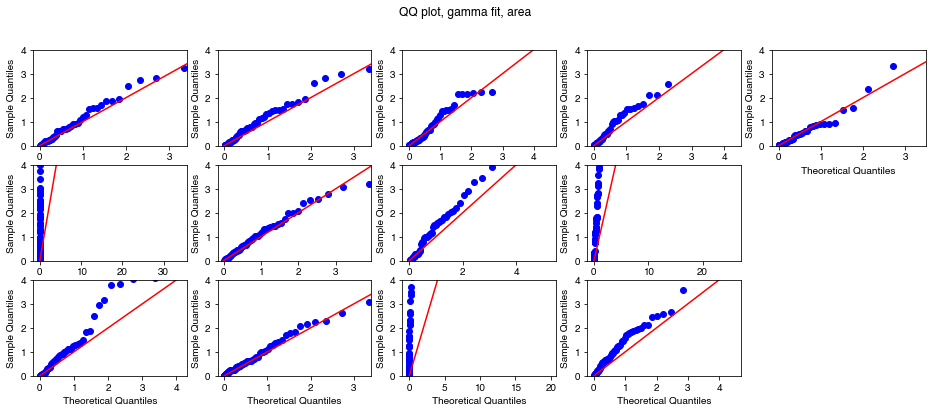

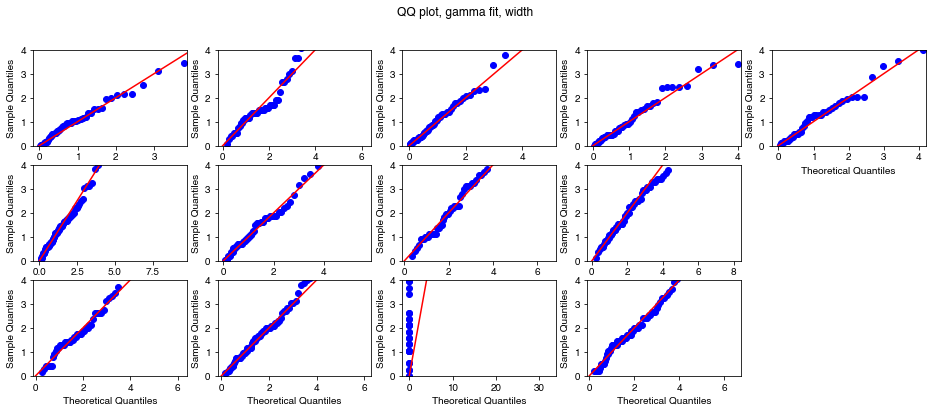

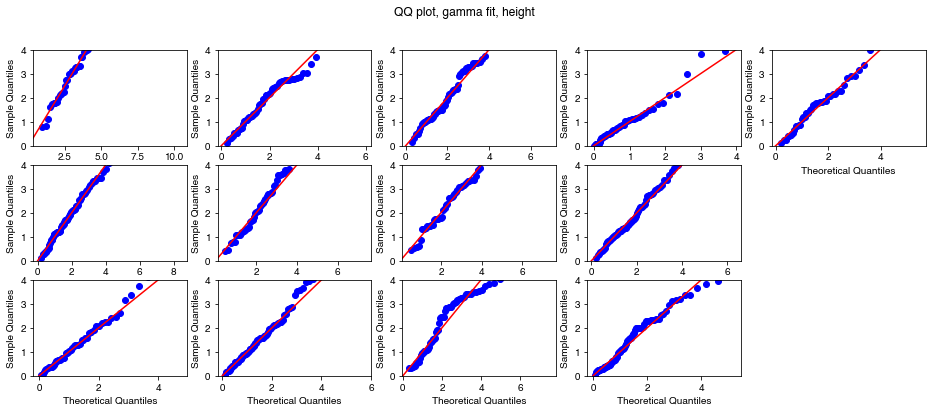

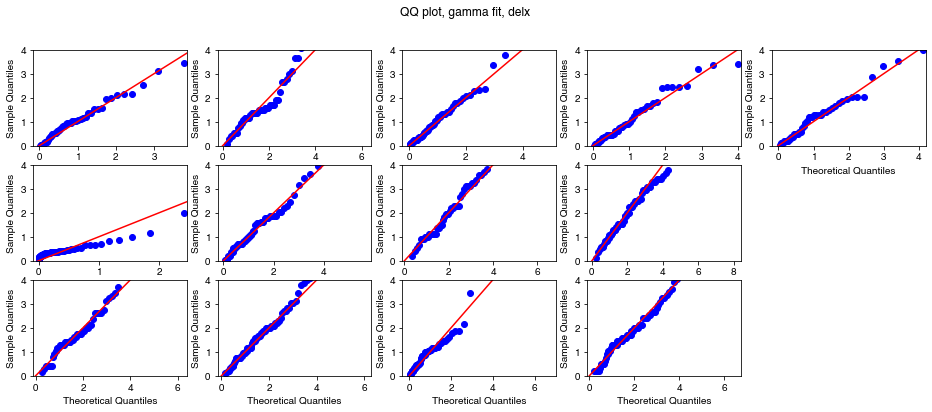

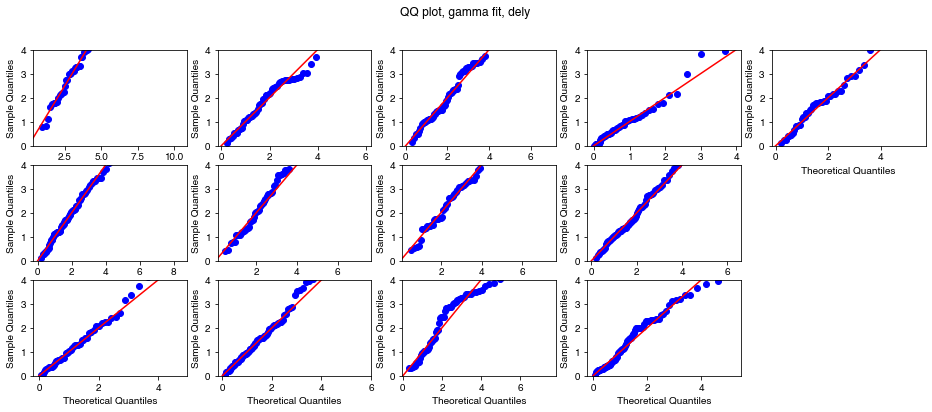

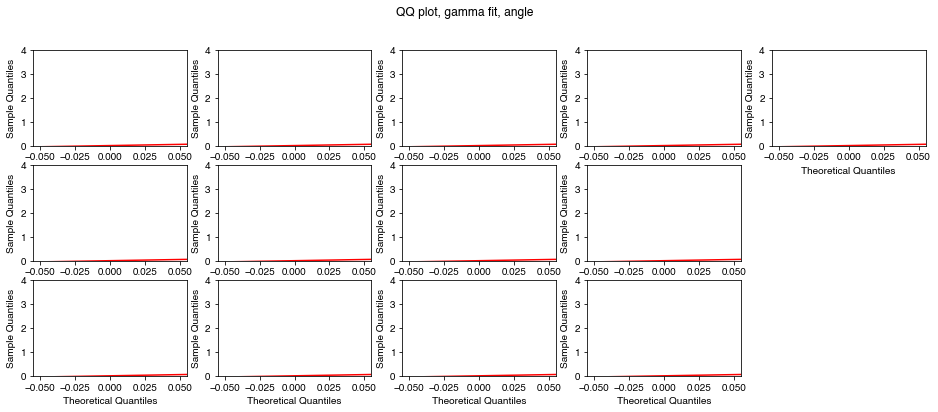

In [20]:
#desiredcols = [3, 8, 9, 10, 12, 13, 14]

sz = (16, 6)
#fig, ax = plt.subplots(4, 3, figsize = (15, 10), tight_layout = True)


for idx, var in enumerate(labels):
    fig, ax = generate_subplots(len(onlyfiles))
    ax = ax.ravel()
    for i in range(len(onlyfiles)):
        sm.qqplot(datalibrary[i][var], dist=stats.gamma, fit=True, ax=ax[i], line='45')
        ax[i].set_ylim(0, 4)
    fig.suptitle(f'QQ plot, gamma fit, {var}')
    
    

In [13]:
#desiredcols = [3, 8, 9, 10, 12, 13, 14]
labels = ['area', 'width', 'height', 'delx', 'dely']
sz = (16, 6)
#fig, ax = plt.subplots(4, 3, figsize = (15, 10), tight_layout = True)


for i in range(len(onlyfiles)):
    fig, ax = generate_subplots(len(onlyfiles))
    ax = ax.ravel()
    for var in labels:
        sm.qqplot(datalibrary[i][var], dist=stats.gamma, fit=True, ax=ax[i], line='45')
    fig.suptitle(f'QQ plot, gammma)

SyntaxError: EOL while scanning string literal (<ipython-input-13-f746eb8ef47b>, line 12)